In [47]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv('../artifacts/data_clean.csv')
df.head()

,Rating,Company Name,Location,Industry,Sector,job_simp,seniority,avg_salary,Size_Upper,Age,Ownership,Revenue_Upper
0,4.2,Boston Consulting Group,Gurgaon,Business consulting,Management and consulting,data scientist,senior,750000.0,large,61.0,private,med
1,3.8,Expedia Partner Solutions,Gurgaon,Internet & Web Services,Information Technology,ML engineer,senior,900000.0,large,28.0,publlic,med
2,3.9,Barclays,Chennai,Banking & Lending,Finance,data scientist,Unknown,950000.0,large,334.0,publlic,high
3,NaN,Excellent Opportunity,Remote,Unknown,Unknown,data scientist,Unknown,3050000.0,Unknown,NaN,Unknown,Unknown
4,NaN,IPCS Global solutions pvt ltd,India,Unknown,Unknown,Unknown,Unknown,126000.0,Unknown,NaN,Unknown,Unknown


In [49]:
df.columns

Index(['Rating', 'Company Name', 'Location', 'Industry', 'Sector', 'job_simp',
       'seniority', 'avg_salary', 'Size_Upper', 'Age', 'Ownership',
       'Revenue_Upper'],
      dtype='object')

In [50]:
df.dtypes

Rating           float64
Company Name      object
Location          object
Industry          object
Sector            object
job_simp          object
seniority         object
avg_salary       float64
Size_Upper        object
Age              float64
Ownership         object
Revenue_Upper     object
dtype: object

In [51]:
num_features = ['Rating', 'Age']
cat_features = ['Company Name', 'Location', 'Ownership', 'Industry', 'Sector', 'job_simp', 'seniority','Revenue_Upper','Size_Upper']

In [52]:
for col in num_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in cat_features:
    df[col] = df[col].astype('category')

In [53]:
df.dtypes

Rating            float64
Company Name     category
Location         category
Industry         category
Sector           category
job_simp         category
seniority        category
avg_salary        float64
Size_Upper       category
Age               float64
Ownership        category
Revenue_Upper    category
dtype: object

In [54]:
df['Revenue_Upper'].value_counts()

Revenue_Upper
Unknown    429
high       166
low        101
med        101
Name: count, dtype: int64

In [55]:
df['seniority'].value_counts()

seniority
Unknown    696
senior      68
junior      33
Name: count, dtype: int64

In [56]:
df.isna().sum()

Rating           265
Company Name       0
Location           0
Industry           0
Sector             0
job_simp           0
seniority          0
avg_salary         0
Size_Upper         0
Age              364
Ownership          0
Revenue_Upper      0
dtype: int64

In [57]:
# Fill missing values in numeric columns with the mean
for col in num_features:
    df[col].fillna(df[col].mean(), inplace=True)
    df[col] = df[col].round(2)

C:\Users\sathv\AppData\Local\Temp\ipykernel_1392\3751792375.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [58]:
df.isna().sum()

Rating           0
Company Name     0
Location         0
Industry         0
Sector           0
job_simp         0
seniority        0
avg_salary       0
Size_Upper       0
Age              0
Ownership        0
Revenue_Upper    0
dtype: int64

In [59]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False,drop='first')

encoded_features = onehot_encoder.fit_transform(df[cat_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(cat_features))

# Concatenate with the original DataFrame
df = pd.concat([df.drop(columns=cat_features), encoded_df], axis=1)

In [60]:
df.head()

,Rating,avg_salary,Age,Company Name_Accusaga,Company Name_Applied Materials,"Company Name_Arch Systems, LLC",Company Name_Barclays,Company Name_Blackcoffer (OPC) Pvt. Ltd,Company Name_Boston Consulting Group,Company Name_Drimlite,...,job_simp_manager,seniority_junior,seniority_senior,Revenue_Upper_high,Revenue_Upper_low,Revenue_Upper_med,Size_Upper_high,Size_Upper_large,Size_Upper_low,Size_Upper_med
0,4.20,750000.0,61.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3.80,900000.0,28.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.90,950000.0,334.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.09,3050000.0,84.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.09,126000.0,84.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
import matplotlib.pyplot as plt

In [62]:
print(df['avg_salary'].describe())

count    7.970000e+02
mean     8.012974e+05
std      6.414229e+05
min      6.250000e+04
25%      4.000000e+05
50%      7.000000e+05
75%      9.500000e+05
max      3.050000e+06
Name: avg_salary, dtype: float64


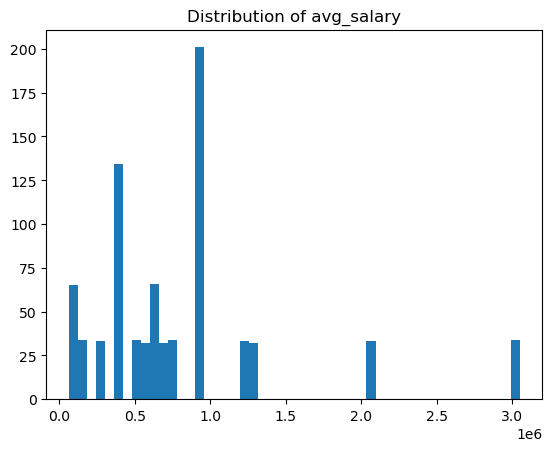

In [63]:
plt.hist(df['avg_salary'], bins=50)
plt.title('Distribution of avg_salary')
plt.show()

<Axes: ylabel='avg_salary'>

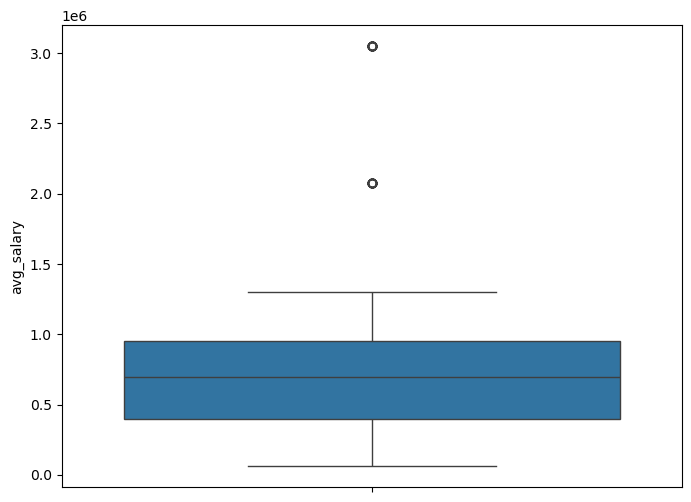

In [64]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(df['avg_salary'])

In [65]:
df['log_avg_salary'] = np.log(df['avg_salary'] + 1)

In [66]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(df['log_avg_salary'])
df = df[np.abs(z_scores) <= 2]

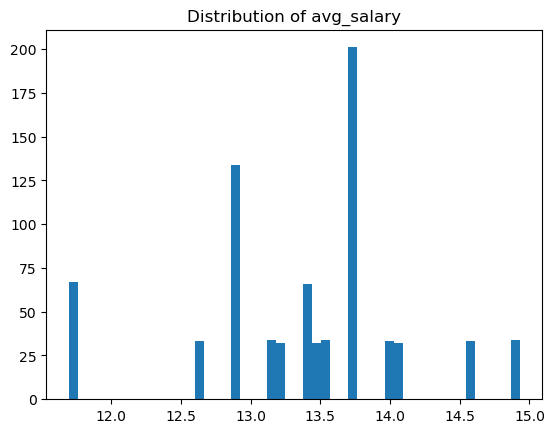

In [67]:
plt.hist(df['log_avg_salary'], bins=50)
plt.title('Distribution of avg_salary')
plt.show()

<Axes: ylabel='log_avg_salary'>

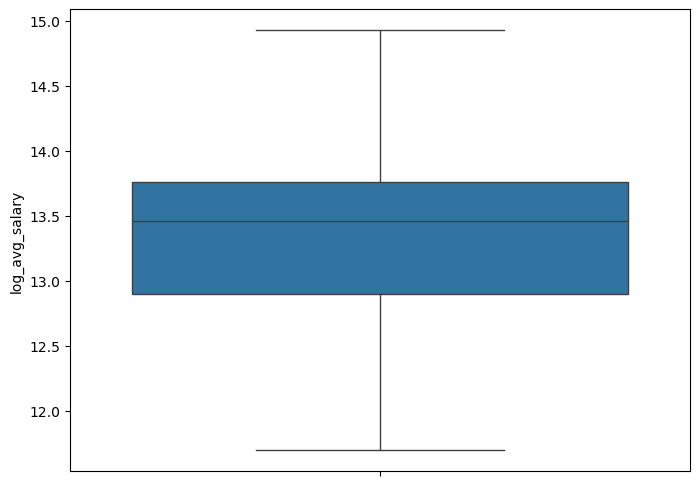

In [68]:
import seaborn as sns

# Boxplot before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['log_avg_salary'])

In [69]:
df=df.drop('avg_salary',axis=1)

In [70]:
df.to_csv("../artifacts/data_transform.csv", index=False)